In [5]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
credit = pd.read_csv('Credit.csv', usecols=list(range(1,12)))
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


### Add dummy variables for the qualitative data

In [11]:
credit = pd.get_dummies(credit, columns = ['Gender', 'Student','Married','Ethnicity'],drop_first = True)
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Male,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,1,0,1,0,1
1,106.025,6645,483,3,82,15,903,0,1,1,1,0
2,104.593,7075,514,4,71,11,580,1,0,0,1,0


### Define function which returns RSS and R-Squared value for a model

In [12]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression()
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

### Implementing Best subset method using itertools.combinations

#### This function does this

In [15]:
#Importing tqdm for the progress bar
from tqdm import tnrange

#Initialization variables
Y = credit.Balance
X = credit.drop('Balance', axis = 1)
#k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Iterations'): 

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        print(combo)
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

HBox(children=(IntProgress(value=0, description='Iterations', max=11, style=ProgressStyle(description_width='initial')), HTML(value='')))

('Income',)
('Limit',)
('Rating',)
('Cards',)
('Age',)
('Education',)
('Gender_Male',)
('Student_Yes',)
('Married_Yes',)
('Ethnicity_Asian',)
('Ethnicity_Caucasian',)
('Income', 'Limit')
('Income', 'Rating')
('Income', 'Cards')
('Income', 'Age')
('Income', 'Education')
('Income', 'Gender_Male')
('Income', 'Student_Yes')
('Income', 'Married_Yes')
('Income', 'Ethnicity_Asian')
('Income', 'Ethnicity_Caucasian')
('Limit', 'Rating')
('Limit', 'Cards')
('Limit', 'Age')
('Limit', 'Education')
('Limit', 'Gender_Male')
('Limit', 'Student_Yes')
('Limit', 'Married_Yes')
('Limit', 'Ethnicity_Asian')
('Limit', 'Ethnicity_Caucasian')
('Rating', 'Cards')
('Rating', 'Age')
('Rating', 'Education')
('Rating', 'Gender_Male')
('Rating', 'Student_Yes')
('Rating', 'Married_Yes')
('Rating', 'Ethnicity_Asian')
('Rating', 'Ethnicity_Caucasian')
('Cards', 'Age')
('Cards', 'Education')
('Cards', 'Gender_Male')
('Cards', 'Student_Yes')
('Cards', 'Married_Yes')
('Cards', 'Ethnicity_Asian')
('Cards', 'Ethnicity_Cau

('Limit', 'Cards', 'Education', 'Ethnicity_Caucasian')
('Limit', 'Cards', 'Gender_Male', 'Student_Yes')
('Limit', 'Cards', 'Gender_Male', 'Married_Yes')
('Limit', 'Cards', 'Gender_Male', 'Ethnicity_Asian')
('Limit', 'Cards', 'Gender_Male', 'Ethnicity_Caucasian')
('Limit', 'Cards', 'Student_Yes', 'Married_Yes')
('Limit', 'Cards', 'Student_Yes', 'Ethnicity_Asian')
('Limit', 'Cards', 'Student_Yes', 'Ethnicity_Caucasian')
('Limit', 'Cards', 'Married_Yes', 'Ethnicity_Asian')
('Limit', 'Cards', 'Married_Yes', 'Ethnicity_Caucasian')
('Limit', 'Cards', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Limit', 'Age', 'Education', 'Gender_Male')
('Limit', 'Age', 'Education', 'Student_Yes')
('Limit', 'Age', 'Education', 'Married_Yes')
('Limit', 'Age', 'Education', 'Ethnicity_Asian')
('Limit', 'Age', 'Education', 'Ethnicity_Caucasian')
('Limit', 'Age', 'Gender_Male', 'Student_Yes')
('Limit', 'Age', 'Gender_Male', 'Married_Yes')
('Limit', 'Age', 'Gender_Male', 'Ethnicity_Asian')
('Limit', 'Age', 'Gender_

('Income', 'Rating', 'Age', 'Education', 'Married_Yes')
('Income', 'Rating', 'Age', 'Education', 'Ethnicity_Asian')
('Income', 'Rating', 'Age', 'Education', 'Ethnicity_Caucasian')
('Income', 'Rating', 'Age', 'Gender_Male', 'Student_Yes')
('Income', 'Rating', 'Age', 'Gender_Male', 'Married_Yes')
('Income', 'Rating', 'Age', 'Gender_Male', 'Ethnicity_Asian')
('Income', 'Rating', 'Age', 'Gender_Male', 'Ethnicity_Caucasian')
('Income', 'Rating', 'Age', 'Student_Yes', 'Married_Yes')
('Income', 'Rating', 'Age', 'Student_Yes', 'Ethnicity_Asian')
('Income', 'Rating', 'Age', 'Student_Yes', 'Ethnicity_Caucasian')
('Income', 'Rating', 'Age', 'Married_Yes', 'Ethnicity_Asian')
('Income', 'Rating', 'Age', 'Married_Yes', 'Ethnicity_Caucasian')
('Income', 'Rating', 'Age', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Rating', 'Education', 'Gender_Male', 'Student_Yes')
('Income', 'Rating', 'Education', 'Gender_Male', 'Married_Yes')
('Income', 'Rating', 'Education', 'Gender_Male', 'Ethnicity_Asia

('Rating', 'Cards', 'Education', 'Gender_Male', 'Married_Yes')
('Rating', 'Cards', 'Education', 'Gender_Male', 'Ethnicity_Asian')
('Rating', 'Cards', 'Education', 'Gender_Male', 'Ethnicity_Caucasian')
('Rating', 'Cards', 'Education', 'Student_Yes', 'Married_Yes')
('Rating', 'Cards', 'Education', 'Student_Yes', 'Ethnicity_Asian')
('Rating', 'Cards', 'Education', 'Student_Yes', 'Ethnicity_Caucasian')
('Rating', 'Cards', 'Education', 'Married_Yes', 'Ethnicity_Asian')
('Rating', 'Cards', 'Education', 'Married_Yes', 'Ethnicity_Caucasian')
('Rating', 'Cards', 'Education', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Rating', 'Cards', 'Gender_Male', 'Student_Yes', 'Married_Yes')
('Rating', 'Cards', 'Gender_Male', 'Student_Yes', 'Ethnicity_Asian')
('Rating', 'Cards', 'Gender_Male', 'Student_Yes', 'Ethnicity_Caucasian')
('Rating', 'Cards', 'Gender_Male', 'Married_Yes', 'Ethnicity_Asian')
('Rating', 'Cards', 'Gender_Male', 'Married_Yes', 'Ethnicity_Caucasian')
('Rating', 'Cards', 'Gender_Male', '

('Income', 'Limit', 'Education', 'Gender_Male', 'Student_Yes', 'Ethnicity_Asian')
('Income', 'Limit', 'Education', 'Gender_Male', 'Student_Yes', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Education', 'Gender_Male', 'Married_Yes', 'Ethnicity_Asian')
('Income', 'Limit', 'Education', 'Gender_Male', 'Married_Yes', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Education', 'Gender_Male', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Education', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian')
('Income', 'Limit', 'Education', 'Student_Yes', 'Married_Yes', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Education', 'Student_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Education', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian')
('Income', 'Limit', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Gender_Male', 'Student_Yes', 'Eth

('Limit', 'Rating', 'Education', 'Student_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Limit', 'Rating', 'Education', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Limit', 'Rating', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian')
('Limit', 'Rating', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Caucasian')
('Limit', 'Rating', 'Gender_Male', 'Student_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Limit', 'Rating', 'Gender_Male', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Limit', 'Rating', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Limit', 'Cards', 'Age', 'Education', 'Gender_Male', 'Student_Yes')
('Limit', 'Cards', 'Age', 'Education', 'Gender_Male', 'Married_Yes')
('Limit', 'Cards', 'Age', 'Education', 'Gender_Male', 'Ethnicity_Asian')
('Limit', 'Cards', 'Age', 'Education', 'Gender_Male', 'Ethnicity_Caucasian')
('Limit', 'Cards', 'Age', 'Education', 'Student_Yes', 'Married_Yes')
('Limit', 'Card

('Income', 'Limit', 'Rating', 'Age', 'Gender_Male', 'Student_Yes', 'Ethnicity_Asian')
('Income', 'Limit', 'Rating', 'Age', 'Gender_Male', 'Student_Yes', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Rating', 'Age', 'Gender_Male', 'Married_Yes', 'Ethnicity_Asian')
('Income', 'Limit', 'Rating', 'Age', 'Gender_Male', 'Married_Yes', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Rating', 'Age', 'Gender_Male', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Rating', 'Age', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian')
('Income', 'Limit', 'Rating', 'Age', 'Student_Yes', 'Married_Yes', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Rating', 'Age', 'Student_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Rating', 'Age', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Rating', 'Education', 'Gender_Male', 'Student_Yes', 'Married_Yes')
('Income', 'Limit', 'Rating', 'Education', 'Gender_Male', 'Student_Yes', 'Ethnicity_Asian')
('Income',

('Limit', 'Rating', 'Cards', 'Age', 'Gender_Male', 'Student_Yes', 'Married_Yes')
('Limit', 'Rating', 'Cards', 'Age', 'Gender_Male', 'Student_Yes', 'Ethnicity_Asian')
('Limit', 'Rating', 'Cards', 'Age', 'Gender_Male', 'Student_Yes', 'Ethnicity_Caucasian')
('Limit', 'Rating', 'Cards', 'Age', 'Gender_Male', 'Married_Yes', 'Ethnicity_Asian')
('Limit', 'Rating', 'Cards', 'Age', 'Gender_Male', 'Married_Yes', 'Ethnicity_Caucasian')
('Limit', 'Rating', 'Cards', 'Age', 'Gender_Male', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Limit', 'Rating', 'Cards', 'Age', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian')
('Limit', 'Rating', 'Cards', 'Age', 'Student_Yes', 'Married_Yes', 'Ethnicity_Caucasian')
('Limit', 'Rating', 'Cards', 'Age', 'Student_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Limit', 'Rating', 'Cards', 'Age', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Limit', 'Rating', 'Cards', 'Education', 'Gender_Male', 'Student_Yes', 'Married_Yes')
('Limit', 'Rating', 'Cards', 'E

('Income', 'Limit', 'Rating', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Cards', 'Age', 'Education', 'Gender_Male', 'Student_Yes', 'Married_Yes')
('Income', 'Limit', 'Cards', 'Age', 'Education', 'Gender_Male', 'Student_Yes', 'Ethnicity_Asian')
('Income', 'Limit', 'Cards', 'Age', 'Education', 'Gender_Male', 'Student_Yes', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Cards', 'Age', 'Education', 'Gender_Male', 'Married_Yes', 'Ethnicity_Asian')
('Income', 'Limit', 'Cards', 'Age', 'Education', 'Gender_Male', 'Married_Yes', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Cards', 'Age', 'Education', 'Gender_Male', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Cards', 'Age', 'Education', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian')
('Income', 'Limit', 'Cards', 'Age', 'Education', 'Student_Yes', 'Married_Yes', 'Ethnicity_Caucasian')
('Income', 'Limit', 'Cards', 'Age', 'Education', 'Student_Yes', 'Ethnicity_Asian', 

('Income', 'Rating', 'Cards', 'Age', 'Education', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Caucasian')
('Income', 'Rating', 'Cards', 'Age', 'Education', 'Gender_Male', 'Student_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Rating', 'Cards', 'Age', 'Education', 'Gender_Male', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Rating', 'Cards', 'Age', 'Education', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Rating', 'Cards', 'Age', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Rating', 'Cards', 'Education', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Rating', 'Age', 'Education', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Income', 'Cards', 'Age', 'Education', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian')
('Limit

In [16]:
df.head(13)

,RSS,R_squared,features,numb_features
0,6.620874e+07,0.214977,"(Income,)",1
1,2.171566e+07,0.742522,"(Limit,)",1
2,2.143512e+07,0.745848,"(Rating,)",1
3,8.370950e+07,0.007475,"(Cards,)",1
4,8.433963e+07,0.000003,"(Age,)",1
5,8.433443e+07,0.000065,"(Education,)",1
6,8.430102e+07,0.000461,"(Gender_Male,)",1
7,7.868154e+07,0.067090,"(Student_Yes,)",1
8,8.433720e+07,0.000032,"(Married_Yes,)",1
9,8.433179e+07,0.000096,"(Ethnicity_Asian,)",1


### Finding the best subset for each number of features

In [19]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))


,RSS,R_squared,features,numb_features
2,2.143512e+07,0.745848,"(Rating,)",1
12,1.053254e+07,0.875118,"(Income, Rating)",2
79,4.227219e+06,0.949879,"(Income, Rating, Student_Yes)",3


,RSS,R_squared,features,numb_features
2,2.143512e+07,0.745848,"(Rating,)",1
12,1.053254e+07,0.875118,"(Income, Rating)",2
79,4.227219e+06,0.949879,"(Income, Rating, Student_Yes)",3


### Adding values minimum RSS and Maximum R_square

In [20]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,RSS,R_squared,features,numb_features,min_RSS,max_R_squared
0,6.620874e+07,0.214977,"(Income,)",1,2.143512e+07,0.745848
1,2.171566e+07,0.742522,"(Limit,)",1,2.143512e+07,0.745848
2,2.143512e+07,0.745848,"(Rating,)",1,2.143512e+07,0.745848
3,8.370950e+07,0.007475,"(Cards,)",1,2.143512e+07,0.745848
4,8.433963e+07,0.000003,"(Age,)",1,2.143512e+07,0.745848


### Plotting the RSS and r_squared

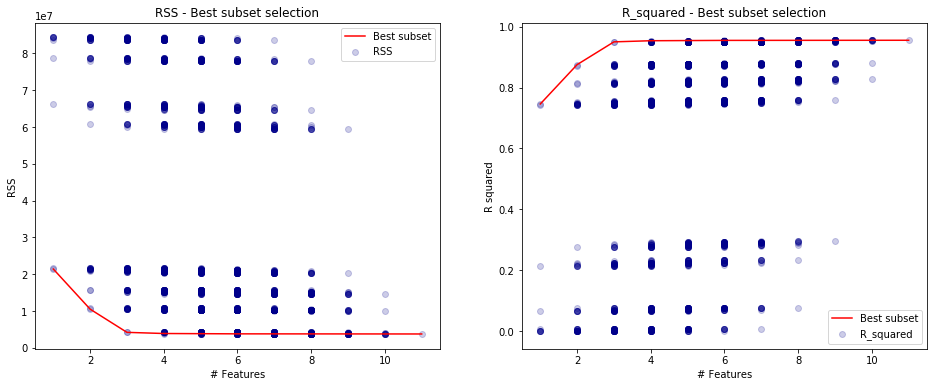

In [21]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

In [34]:
df[df['numb_features'] == 3]

,RSS,R_squared,features,numb_features,min_RSS,max_R_squared
66,1.043800e+07,0.876239,"(Income, Limit, Rating)",3,4.227219e+06,0.949879
67,1.054447e+07,0.874977,"(Income, Limit, Cards)",3,4.227219e+06,0.949879
68,1.079715e+07,0.871981,"(Income, Limit, Age)",3,4.227219e+06,0.949879
69,1.086679e+07,0.871155,"(Income, Limit, Education)",3,4.227219e+06,0.949879
70,1.087022e+07,0.871114,"(Income, Limit, Gender_Male)",3,4.227219e+06,0.949879
71,4.316997e+06,0.948814,"(Income, Limit, Student_Yes)",3,4.227219e+06,0.949879
72,1.081343e+07,0.871788,"(Income, Limit, Married_Yes)",3,4.227219e+06,0.949879
73,1.082557e+07,0.871644,"(Income, Limit, Ethnicity_Asian)",3,4.227219e+06,0.949879
74,1.086104e+07,0.871223,"(Income, Limit, Ethnicity_Caucasian)",3,4.227219e+06,0.949879
75,1.053045e+07,0.875143,"(Income, Rating, Cards)",3,4.227219e+06,0.949879
